# Assignment 3A by Hasanat Hasan


# Problem 1 (50 points): 
##### Given below is a differential equation
$$
\frac{dx}{dt} = -x^{3} + \sin(t)
$$
##### with the initial condition $x = 0$ at $t= 0 $

##### a) Write a program that uses the midpoint method (2nd order Runge–Kutta method) to solve the differential equation.


## Problem 1 Utilities cell:


In [6]:
import matplotlib.pyplot as plt
import numpy as np

''' 
Midpoint point method:
    y(t+h) = y(t) + f( t+h/2, y(t)+f( t,y(t) )h/2 )h

    {
    k1 = f( t,y(t) )h
    k2 = f( t+h/2, y(t)+k1/2 )h
    y(t+h) = y(t) + k2 + O(h^3)
    }
'''
def Sin_and_Poly_deriv(x_value:float, t_value:float):
    """ 
    this function returns the value of the derivative function:
        dy/dt = -x^3 + sin(t)
    at a given (x,t)
    """
    value = (-1)*x_value**(3) + np.sin(t_value) # sin(t) is in radians 
    return value

def euler_method(ODE_function, initial_vector: np.ndarray, final_time: float, num_steps: float):
    '''    
    approximates y(t) using the fact that if y(t) (y: R -> R)  is k-differentiable at t, then its k-degree taylor expansion exists
    y(t) ~ y(t_o) + h * (dy/dt)
    convention: initial_vector[0] = initial_time
    convention: initial_vector[1] = initial position
    '''

    # initialing variables:
    t_0 = initial_vector[0]
    step_size = (final_time-t_0)/num_steps
    t_array  = np.arange(t_0, final_time + step_size, step_size)
    y_array = np.zeros(len(t_array))
    y_array[0] = initial_vector[1] 

    # Iteratively calculating y(t) at each t using euler's method
    for idx in range(len(t_array)-1):
        y_array[idx+1] = y_array[idx] + step_size * ODE_function(y_array[idx],t_array[idx])

    return y_array, t_array


def calculate_k1(deriv_func, time: float, y_value: float, height: float)->float:    
    ''' 
    Calculates k1 = f( t,y(t) )h
    '''
    return deriv_func( y_value, time) * height

def calculate_k2(deriv_func, time: float, y_value: float, height: float, k1: float)->float:
    ''' 
    Calculates k2 = f( t+h/2, y(t)+k1/2 )h
    '''
    y = y_value+(k1/2)
    t = time+(height/2) 
    return deriv_func( y, t) * height

def calculate_k3(deriv_func, time: float, y_value: float, height: float, k2: float)->float:
    ''' 
    Calculates k3 = f( t+h/2, y(t)+k2/2 )h
    '''
    y = y_value+(k2/2)
    t = time+(height/2) 
    return deriv_func( y, t) * height

def calculate_k4(deriv_func, time: float, y_value: float | np.ndarray, height: float, k3: float)->float:
    ''' 
    Calculates k4 = f( t+h/2, y(t)+k3/2 )h
    '''
    y = y_value+(k3)
    t = time+(height) 
    return deriv_func( y, t) * height


def RK2_approx(deriv_func, initial_vector: np.ndarray, final_time: float, num_steps: int):
    ''' 
    Midpoint point method:
    y(t+h) = y(t) + f( t+h/2, y(t)+f( t,y(t) )h/2 )h

    {
    k1 = f( t,y(t) )h\n
    k2 = f( t+h/2, y(t)+k1/2 )h\n
    y(t+h) = y(t) + k2 + O(h^3)
    }

    convention: 
        initial_vector[0] = initial time
        initial_vector[1] = initial position
    '''
    # initialing variables:
    t_0 = initial_vector[0]
    step_size = (final_time-t_0)/num_steps
    t_array  = np.arange(t_0, final_time + step_size, step_size)
    y_list = [initial_vector[1]] 

    y = initial_vector[1]
    for t_i in t_array[:-1]:
        k1 = calculate_k1(deriv_func, t_i, y, step_size)
        k2 = calculate_k2(deriv_func, t_i, y, step_size, k1)
        y = y + k2
        y_list.append(y)

    return y_list, t_array

def RK4_approx(deriv_func, initial_vector: np.ndarray, final_time: float, num_steps: int):
    ''' 
    Midpoint point method:
    y(t+h) = y(t) + f( t+h/2, y(t)+f( t,y(t) )h/2 )h

    {
    k1 = f( t,y(t) )h\n
    k2 = f( t+h/2, y(t)+k1/2 )h\n
    k3 = f( t+h/2, y(t)+k2/2 )h\n
    k4 = f( t+h/2, y(t)+k3/2 )h\n
    y(t+h) = y(t) + 1/6 * (k1 + 2k2 + 2k3 +k4) + O(h^4)
    }

    convention: 
        initial_vector[0] = initial time
        initial_vector[1] = initial position
    '''
    # initialing variables:
    t_0 = initial_vector[0]
    step_size = (final_time-t_0)/num_steps
    t_array  = np.arange(t_0, final_time + step_size, step_size)
    y_list = [initial_vector[1]] 

    y = initial_vector[1]
    for t_i in t_array[:-1]:
        k1 = calculate_k1(deriv_func, t_i, y, step_size)
        k2 = calculate_k2(deriv_func, t_i, y, step_size, k1)
        k3 = calculate_k3(deriv_func, t_i, y, step_size, k2)
        k4 = calculate_k4(deriv_func, t_i, y, step_size, k3)
        y = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        y_list.append(y)

    return y_list, t_array

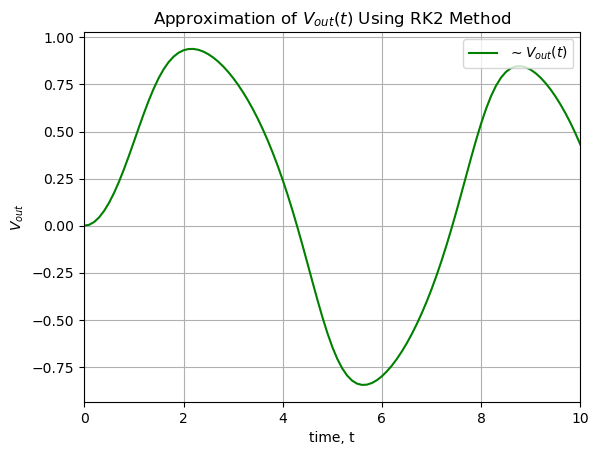

In [7]:
# inital condition: 
init_vec = [0,0]
steps = 100
t_f = 10

positions_euler, times_array = RK2_approx(Sin_and_Poly_deriv, init_vec, t_f, steps)

# plotting
plt.title(r"Approximation of $V_{out}(t)$ Using RK2 Method")
plt.plot(times_array, positions_euler, color='green', label=r"$\sim V_{out}(t)$")
plt.xlabel("time, t")
plt.ylabel(r"$V_{out}$")
plt.xlim(0,t_f)
plt.legend(loc='upper right')
plt.grid()
plt.show()


##### b) Write a program that uses the 4th order Runge–Kutta method to solve the differential equation

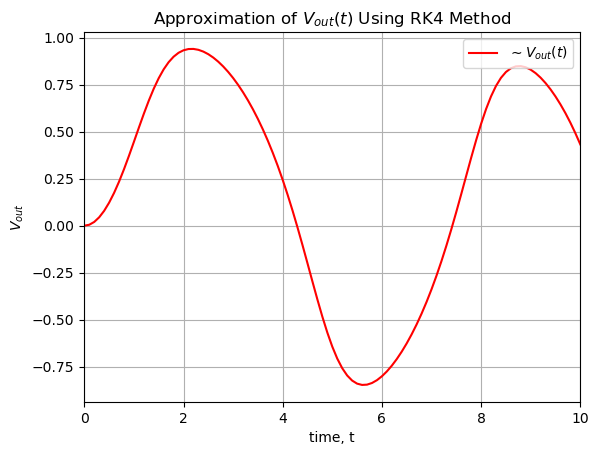

In [94]:
# inital condition: 
init_vec = [0,0]
steps = 100
t_f = 10

positions_euler, times_array = RK4_approx(Sin_and_Poly_deriv, init_vec, t_f, steps)

# plotting
plt.title(r"Approximation of $V_{out}(t)$ Using RK4 Method")
plt.plot(times_array, positions_euler, color='red', label=r"$\sim V_{out}(t)$")
plt.xlabel("time, t")
plt.ylabel(r"$V_{out}$")
plt.xlim(0,t_f)
plt.legend(loc='upper right')
plt.grid()
plt.show()


##### c) For both programs, calculate from t = 0 to t = 10 using a reasonable number of steps. Plot the results for each of the methods, including the one from the previous assignment for Euler’s method. Do you see improved accuracy with higher-order Runge–Kutta methods? Why?

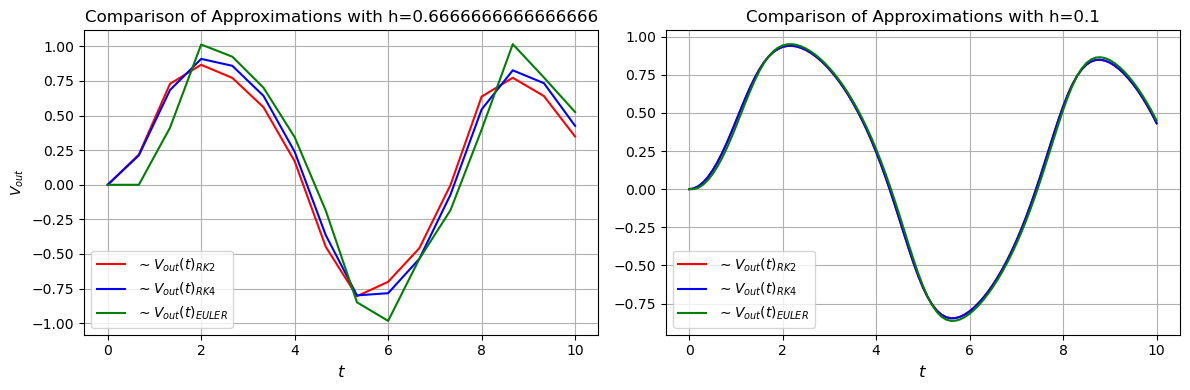

In [95]:
# inital condition: 
big_steps = 15
small_steps = 100
t_0 = 0
t_f = 10
init_vec = [t_0,0]
big_step_size = (t_f-t_0)/big_steps
small_step_size = (t_f-t_0)/small_steps

# positions using big step size 
pos_rk2_big_step, times_big_step = RK2_approx(Sin_and_Poly_deriv, init_vec, t_f, big_steps)
pos_rk4_big_step, _ = RK4_approx(Sin_and_Poly_deriv, init_vec, t_f, big_steps)
pos_euler_big_step, _ = euler_method(Sin_and_Poly_deriv,init_vec, t_f,big_steps)

# positions using small step size
pos_rk2_small_step, times_small_step = RK2_approx(Sin_and_Poly_deriv, init_vec, t_f, small_steps)
pos_rk4_small_step, _ = RK4_approx(Sin_and_Poly_deriv, init_vec, t_f, small_steps)
pos_euler_small_step, _ = euler_method(Sin_and_Poly_deriv,init_vec, t_f,small_steps)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot on the first axis
ax1.plot(times_big_step, pos_rk2_big_step, color='red', label=r"$\sim V_{out} (t)_{RK2}$")
ax1.plot(times_big_step, pos_rk4_big_step, color='blue', label=r"$\sim V_{out} (t)_{RK4}$")
ax1.plot(times_big_step, pos_euler_big_step, color='green', label=r"$\sim V_{out} (t)_{EULER}$")
ax1.set_title(rf"Comparison of Approximations with h={big_step_size}")
ax1.set_xlabel(r'$t$', fontsize=12)
ax1.set_ylabel(r"$V_{out}$")
# ax1.set_xlim(0,1)
ax1.legend()
ax1.grid()

# Plot on the second axis
ax2.plot(times_small_step, pos_rk2_small_step, color='red', label=r"$\sim V_{out} (t)_{RK2}$")
ax2.plot(times_small_step, pos_rk4_small_step, color='blue', label=r"$\sim V_{out} (t)_{RK4}$")
ax2.plot(times_small_step, pos_euler_small_step, color='green', label=r"$\sim V_{out} (t)_{EULER}$")
ax2.set_title(rf"Comparison of Approximations with h={small_step_size}")
ax2.set_xlabel(r'$t$', fontsize=12)
# ax2.set_ylabel(r"$x$")
# ax2.set_xlim(0,1)
ax2.legend()
ax2.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

##### In the plots above, I display the apporximations of all methods for 2 different step sizes, $h = \{2/3 , 0.1\}$, and as we can see in the plots, the RK4 approximation is already very close to the plot on the right (accurate approximation), and in fact converges to it faster than the other methods. This is because the RK4 method is derived by truncating a taylor series exapansion at the 3rd power, so its error is O(h^4). The error in RK2 is O(h^3), and the error in Euler's Method is O(h^2).

# Problem 2 (50 points): A low-pass filter.
##### a) Write a program (or modify a previous program) to solve this equation for $V_{out(t)}$ using the 4th-order Runge–Kutta method when the input signal is a square-wave with frequency 1 and amplitude 1.

##### Use the program to make plots of the output of the filter circuit from t = 0 to t = 10 when RC = 0.01, 0.1, and 1, with the initial condition Vout(0) = 0. where Vin(t) is a square wave defined as:
$$
V_{in} (t) = 1, \text{if floor of 2t is even}\\
V_{in} (t) = -1, \text{if floor of 2t is odd}
$$

## Problem 2 Utilities cell:


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def dvdt(RC: float, time_value: float, v_out: float):
    return (1 / RC) * ((1 - v_out) if int(np.floor(2 * time_value)) % 2 == 0 else (-1 - v_out))

def calculate_k1(deriv_func, RC:float, time: float, v_out: float, height: float)->float:    
    ''' 
    Calculates k1 = f( t,y(t) )h
    '''
    return deriv_func(RC, time, v_out) * height

def calculate_k2(deriv_func, RC:float, time: float, v_out: float, height: float, k1: float)->float:
    ''' 
    Calculates k2 = f( t+h/2, y(t)+k1/2 )h
    '''
    v_o = v_out+(k1/2)
    t = time+(height/2) 
    return deriv_func(RC, t, v_o) * height

def calculate_k3(deriv_func, RC:float, time: float, v_out: float, height: float, k2: float)->float:
    ''' 
    Calculates k3 = f( t+h/2, y(t)+k2/2 )h
    '''
    v_o = v_out+(k2/2)
    t = time+(height/2) 
    return deriv_func(RC, t, v_o) * height

def calculate_k4(deriv_func, RC:float, time: float, v_out: float, height: float, k3: float)->float:
    ''' 
    Calculates k4 = f( t+h/2, y(t)+k3/2 )h
    '''
    v_o = v_out+(k3)
    t = time+(height) 
    return deriv_func(RC, t, v_o) * height

def signal_RK4_approx(deriv_func, RC: float, initial_vector: np.ndarray, final_time: float, num_steps: int):
    ''' 
    RK4 approximation:
    y(t+h) = y(t) + f( t+h/2, y(t)+f( t,y(t) )h/2 )h

    {
    k1 = f( t,y(t) )h\n
    k2 = f( t+h/2, y(t)+k1/2 )h\n
    k3 = f( t+h/2, y(t)+k2/2 )h\n
    k4 = f( t+h/2, y(t)+k3/2 )h\n
    y(t+h) = y(t) + 1/6 * (k1 + 2k2 + 2k3 +k4) + O(h^4)
    }

    convention: 
        initial_vector[0] = initial time
        initial_vector[1] = initial voltage
    '''
    # initialing variables:
    t_0 = initial_vector[0]
    step_size = (final_time-t_0)/num_steps
    t_array  = np.arange(t_0, final_time + step_size, step_size)
    V_out_list = [initial_vector[1]] 
 
    v_0 = initial_vector[1]
    for t_i in t_array[:-1]:
        # print(v_0)
        k1 = calculate_k1(deriv_func, RC, t_i, v_0, step_size)
        k2 = calculate_k2(deriv_func, RC, t_i, v_0, step_size, k1)
        k3 = calculate_k3(deriv_func, RC, t_i, v_0, step_size, k2)
        k4 = calculate_k4(deriv_func, RC, t_i, v_0, step_size, k3)
        v_0 = v_0 + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        V_out_list.append(v_0)

    return V_out_list, t_array

def fourier_expansion(RC: float, time_value: float, truncation_value: int):
    ''' 
    Applying the fourier expansion to compute V_{inf} 
    '''
    # initialize constants
    alpha = 1/(RC)
    N = truncation_value
    w_0 = 2 * np.pi
    t = time_value
    # Generate odd n values: 1, 3, 5, ..., N
    n: np.ndarray = np.arange(1, N + 1, 2)
    
    # Calculate w_n = (4 / pi) * n
    w_n: np.ndarray = (4 /( np.pi * n))
    
    # Calculate terms
    denominator: np.ndarray = alpha**2 + (w_0**2) * (n**2)
    cos_terms: np.ndarray = np.cos(w_0 * n * t)
    sin_terms: np.ndarray = np.sin(w_0 * n * t)
    
    # Compute the summand for each n
    summand = (alpha * w_n / denominator) * (-w_0 * n * cos_terms + alpha * sin_terms)
    
    # Return the sum
    return np.sum(summand)

### $V_{out}$ Plots:

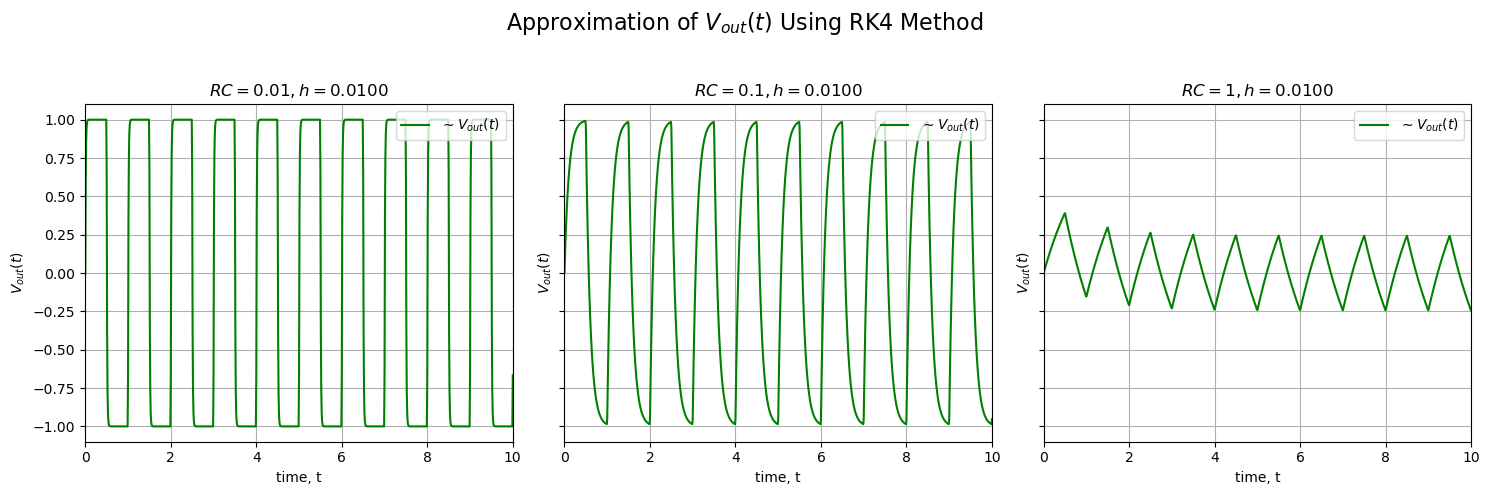

In [ ]:
import matplotlib.pyplot as plt

# Parameters
t_0 = 0
t_f = 10
steps = 1000
step_size = (t_f - t_0) / steps
init_vec = [t_0, 0]

# RC values to compare
RC_values = [0.01, 0.1, 1]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle(r"Approximation of $V_{out}(t)$ Using RK4 Method", fontsize=16)

# Generate and plot results for each RC
for ax, RC in zip(axes, RC_values):
    V_out_list, times_array = signal_RK4_approx(dvdt, RC, init_vec, t_f, steps)
    
    ax.plot(times_array, V_out_list, label=r"$\sim V_{out}(t)$", color='green')
    ax.set_title(rf"$RC={RC}, h={step_size:.4f}$")
    ax.set_xlabel("time, t")
    ax.set_ylabel("$V_{out}(t)$")
    ax.set_xlim(t_0,t_f)
    ax.grid()
    ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

##### b) Compare the large-time behavior of Vout(t) with the expected periodic solution calculated using the Fourier series for $V_{in} (t)$. The Fourier series expansion of the square wave (approximated by truncating the series up to a chosen value of N) is given by:
$$
V_{in} (t) \sim \sum_{n=1}^{N} w_{n}\sin(2\pi n t)
$$
##### where $w_n = \frac{4}{\pi n}$ for odd positive $n$ and 0 for all other n.
##### Using this expansion, the periodic part of $V_{out}(t)$ can be approximated as:
$$
\bar{V}_{\infty} \sim \sum_{n = 1,3,5,...}^{N} \frac{\alpha w_n}{\alpha^{2} + w^2_n n^2}\left( -w_0 n \cos(w_0 n t) + \alpha \sin(w_0 n t) \right)
$$
##### where $\alpha = (RC)^{-1}$, and $w_0 = 2\pi$
##### Write a program to compute $\bar{V}_{\infty}(t)$ using this formula for a chosen number of terms N in the series. Use the same values of RC as in part (a). Compare these results with the numerical solution you obtained earlier

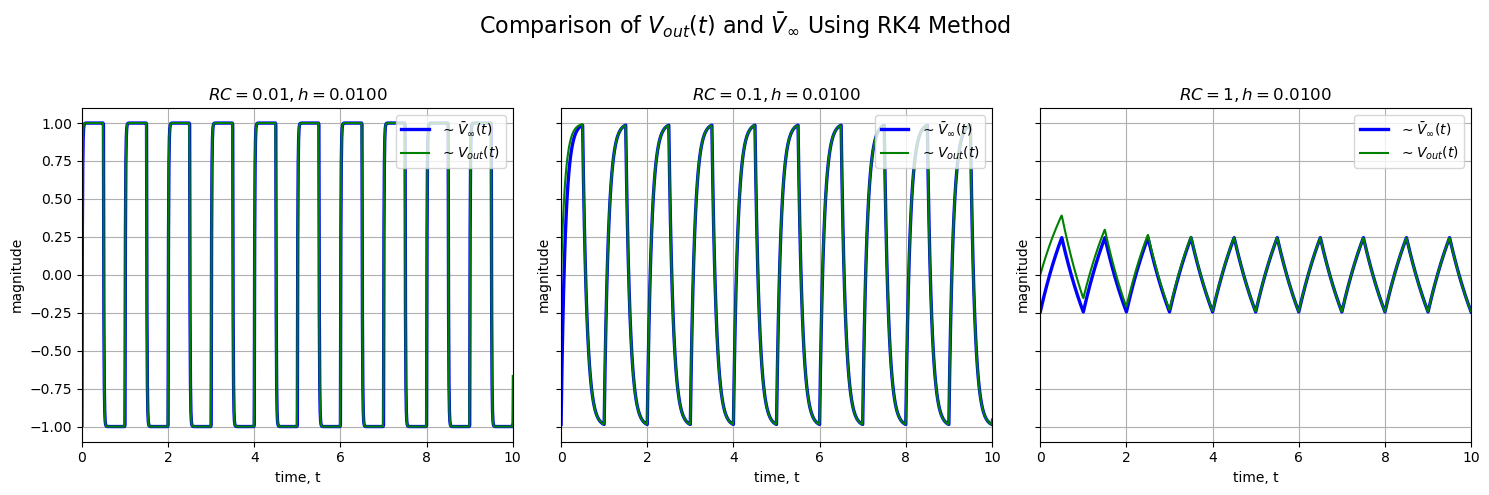

In [19]:
# Parameters
t_0 = 0
init_vec = [t_0, 0]
steps = 1000
t_f = 10
step_size = (t_f - t_0) / steps

# RC values to compare
RC_values = [0.01, 0.1, 1]
t_array  = np.arange(t_0, t_f + step_size, step_size)
N = 1101

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle(r"Comparison of $V_{out}(t)$ and $\bar{V}_{\infty}$ Using RK4 Method", fontsize=16)

# Generate and plot results for each RC
for ax, RC in zip(axes, RC_values):
    V_out_list, times_array = signal_RK4_approx(dvdt, RC, init_vec, t_f, steps)
    values = [fourier_expansion(RC, t, N) for t in t_array]    
    ax.plot(t_array, values, label=r"$\sim \bar{V}_{\infty}(t)$", color='blue', linewidth =2.4)
    ax.plot(times_array, V_out_list, label=r"$\sim V_{out}(t)$", color='green')
    ax.set_title(rf"$RC={RC}, h={step_size:.4f}$")
    ax.set_xlabel("time, t")
    ax.set_ylabel("magnitude")
    ax.set_xlim(t_0,t_f)
    ax.grid()
    ax.legend(loc='upper right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


#### c) Based on the graphs produced by your program, describe what you see and explain what the circuit is doing for different values of RC.

#### These results are notabley different for RC = 1. $\bar{V}_{\infty}$ is a periodic and centered at 0, $V_{out}$ is also peridic, however it isn't completely centered at 0, it shifts its center from an intitial state to 0. Not only that, but its very damped- implying the output of the signal was significantly reduecd.    

#### for RC = 0.01, the output seems to be very well aligned with the input signal, implying that the impedence of low-pass filter does not block the input signal. for RC = 0.1, we can observe a change in shape of the output-it resembles a saw wave, implying very slight delay. for RC =1, we finally observe real blockage of teh signal, the amplitde of the output is signifcantly lower than the input.  